In [1]:
%reload_ext rpy2.ipython
%reload_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

In [56]:
%%R

require('ggplot2')

In [2]:
%%R

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Lade nötiges Paket: tidyverse


In [105]:
%%R


df <- read_csv('2024.csv')

df

Rows: 6 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Product Type
dbl (2): Year, Count

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 6 × 3
   Year `Product Type` Count
  <dbl> <chr>          <dbl>
1  2024 Food/Cosmetics   408
2  2024 Devices          307
3  2024 Drugs            136
4  2024 Biologics        117
5  2024 Veterinary        34
6  2024 Tobacco            1


In [116]:
%%R

df_expanded <- df %>%
  mutate(`Product Type` = ifelse(`Product Type` == "Food/Cosmetics", "Food/Cosmetics", "Others")) %>%
  group_by(Year, `Product Type`) %>%
  summarise(Count = sum(Count), .groups = "drop")

df_expanded

# A tibble: 2 × 3
   Year `Product Type` Count
  <dbl> <chr>          <dbl>
1  2024 Food/Cosmetics   408
2  2024 Others           595


In [123]:
%%R

df_tiles <- df_expanded %>%
  mutate(Count = floor(Count / 10)) %>%  # Ensure integer counts
  uncount(Count) %>%
  mutate(x = rep(1:10, length.out = n()),  # Reduce number of columns
         y = rep(1:100, each = 10, length.out = n()))

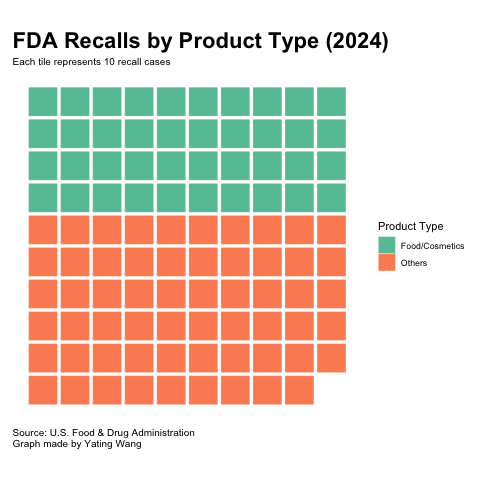

In [134]:
%%R 
chart <- ggplot(df_tiles, aes(x = x, y = -y, fill = `Product Type`)) +
  geom_tile(color = "white", width = 0.9, height = 0.9) +  # Ensure square tiles
  scale_fill_brewer(palette = "Set2") +  
  theme_minimal() +
  labs(
    title = "FDA Recalls by Product Type (2024)",
    subtitle = "Each tile represents 10 recall cases",
    fill = "Product Type",
    caption = "Source: U.S. Food & Drug Administration \nGraph made by Yating Wang",
    x = NULL,
    y = NULL
  ) +
  coord_fixed(ratio = 1) +  # Ensures tiles remain squares
  theme(
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank(),
    plot.title = element_text(size = 22, face = "bold"),  
    plot.subtitle = element_text(size = 10, margin = margin(b = 5)),  
    plot.caption = element_text(size = 10, hjust = 0),
    plot.margin = margin(t = 10, r = 10, b = 10, l = 10)
  )

chart


In [135]:
%%R

ggsave('tile.png', plot = chart)

Saving 6.67 x 6.67 in image
